In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

#AUCplot = plt.figure()


In [ ]:
modelOptions = ["MLP",
                "Perceptron",
                "LDA", 
                "SVM",
                "Logistic Regression"
                ]

lineStyles = ["-",
                "--",
                "-.", 
                ":",
                "-"
                ]

x = list(range(1, 129))

dataAblationOrder = {#Specify order in which to successively remove PSD components based on frequency.
        "High to low frequency":["highFreqtoLowFreq", 0],
        "Low to high frequency":["lowFreqtoHighFreq", 1]
    }
#Create data ablation plots
for order in dataAblationOrder:
    plt.figure()
    plt.gca().invert_xaxis()
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
    plt.gca().yaxis.set_ticks_position('both')
    plt.gca().xaxis.set_ticks_position('both')
    plt.gca().tick_params(axis="both", direction="in", tickdir = "inout")
    plt.ylabel("AUC (%)")
    plt.xlabel("Number of PSD Components")
    for selectedModel, lineStyle in zip(modelOptions, lineStyles):
        #Read log file for AUCs and number of PSD components.
        file = open("../results_{}/{}_AUC.csv".format(dataAblationOrder[order][0],selectedModel), "r")
        data = file.readlines()
        y = []
        y_stdDev = []
        for line in data[2:]:
            y.append(float(line.split(",")[1].split("\n")[0])*100)
            y_stdDev.append(float(line.split(",")[2].split("\n")[0])*100)
        y_posStdDev = [element1 + element2 for element1, element2 in zip(y, y_stdDev)]
        y_negStdDev = [element1 - element2 for element1, element2 in zip(y, y_stdDev)]
        plt.plot(x, y, label = selectedModel, linestyle = lineStyle, linewidth = 2)
        plt.fill_between(x, y_posStdDev, y_negStdDev, alpha=0.2)
    plt.legend(loc="lower left")
    plt.savefig("../results_{}/AUC_{}".format(dataAblationOrder[order][0], dataAblationOrder[order][0]))

In [ ]:
#Create bar chart for optmized AUC and confidence
colors = ["royalblue",
            "slateblue", 
            "deepskyblue",
            "lightskyblue",
            "powderblue"
]
plt.rcParams["figure.figsize"] = (10,8)
for order in dataAblationOrder:
    y = []
    y_stdDev = []
    y_numOfComponents = []
    plt.figure()
    plt.grid(axis="y")
    for selectedModel in modelOptions:
        #Read log file for AUCs and number of PSD components.
        file = open("../results_{}/{}_AUC.csv".format(dataAblationOrder[order][0],selectedModel), "r")
        data = file.readlines()
        #Initialize with values from first line in CSV file
        y_max = float(data[2].split(",")[1].split("\n")[0])*100
        y_stdDevMin = float(data[2].split(",")[2].split("\n")[0])*100
        numberOfPSDComponents = 1
        for line in data[2:]:
            grandAverageAUC = float(line.split(",")[1].split("\n")[0])*100
            #Check if greater than or equal to current max value.
            if y_max <= grandAverageAUC:
                grandAverageAUCStdDev = float(line.split(",")[2].split("\n")[0])*100 
                #Check if min standard dev
                if grandAverageAUCStdDev <= y_stdDevMin:
                    y_max = grandAverageAUC
                    y_stdDevMin = grandAverageAUCStdDev
                    numberOfPSDComponents = line.split(",")[0].split("\n")[0]
        y.append(round(y_max, 3))
        y_stdDev.append(round(y_stdDevMin, 3))
        y_numOfComponents.append(numberOfPSDComponents)
    plt.gca().set_axisbelow(True)
    plt.bar(modelOptions, y, color=colors, yerr=y_stdDev, capsize=3.0, width=0.6)
    plt.gca().get_xaxis().set_visible(False)
    plt.ylim(bottom=90, top=102)
    # Add a table at the bottom of the axes
    yString = [str(element) for element in y]
    y_stdDevString = [str(element) for element in y_stdDev]
    cellText = []
    cellText.append(yString)
    cellText.append(y_stdDevString)
    cellText.append(y_numOfComponents)
    plt.table(cellText=cellText,
                      rowLabels= ["Intersubject AUC (%)", "Standard Deviation (%)", "Number of PSD Components"],
                      colLabels= modelOptions,
                      loc='bottom').auto_set_font_size(False)
    plt.savefig("../results_{}/AUC_barchart_{}".format(dataAblationOrder[order][0], dataAblationOrder[order][0]))

IndexError: list index out of range

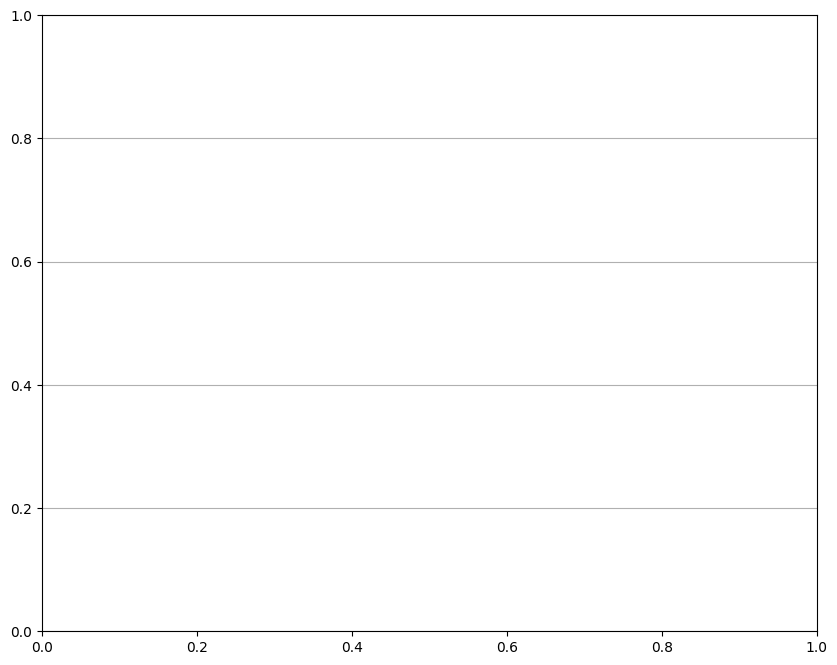

In [5]:
#Create bar chart for naive AUC and confidence using all PSD components.
colors = ["royalblue",
            "slateblue", 
            "deepskyblue",
            "lightskyblue",
            "powderblue"
]
plt.rcParams["figure.figsize"] = (10,8)

y = []
y_stdDev = []
y_numOfComponents = []
plt.figure()
plt.grid(axis="y")
for selectedModel in modelOptions:
    #Read log file for AUCs and number of PSD components.
    file = open("../results_{}/{}_AUC.csv".format(dataAblationOrder["High to low frequency"][0],selectedModel), "r")
    data = file.readlines()
    numberOfPSDComponents = 129
    grandAverageAUC = float(data[numberOfPSDComponents+1].split(",")[1].split("\n")[0])*100
    grandAverageAUCStdDev = float(data[numberOfPSDComponents+1].split(",")[2].split("\n")[0])*100 
    y.append(round(y_max, 3))
    y_stdDev.append(round(y_stdDevMin, 3))
plt.gca().set_axisbelow(True)
plt.bar(modelOptions, y, color=colors, yerr=y_stdDev, capsize=3.0, width=0.6)
plt.gca().get_xaxis().set_visible(False)
plt.ylim(bottom=90, top=102)
# Add a table at the bottom of the axes
yString = [str(element) for element in y]
y_stdDevString = [str(element) for element in y_stdDev]
cellText = []
cellText.append(yString)
cellText.append(y_stdDevString)
cellText.append(y_numOfComponents)
plt.table(cellText=cellText,
                    rowLabels= ["Intersubject AUC (%)", "Standard Deviation (%)"],
                    colLabels= modelOptions,
                    loc='bottom').auto_set_font_size(False)
plt.savefig("../results_{}/AUC_barchart_{}".format(dataAblationOrder[order][0], dataAblationOrder[order][0]))